<a href="https://colab.research.google.com/github/Zkr-smd/CEPROJECT/blob/main/ET7/Projet_CE_ET7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Lire les fichiers texte
with open("/content/training.txt", "r") as f:
    training_raw = f.read()

with open("/content/test.txt", "r") as f:
    test_raw = f.read()


In [3]:
import re
import numpy as np

def parse_c_array_to_numpy(text, nb_samples, frames, coeffs):
    # Récupère tous les floats
    floats = [float(x) for x in re.findall(r"[-+]?[0-9]*\.?[0-9]+", text)]

    # Tronquer si trop de valeurs
    expected_len = nb_samples * frames * coeffs
    floats = floats[:expected_len]

    return np.array(floats).reshape((nb_samples, frames, coeffs))


# Training : 100 enregistrements, 48 frames, 13 coefficients MFCC
X_train = parse_c_array_to_numpy(training_raw, 100, 48, 13)

# Test : 10 enregistrements, 48 frames, 13 coefficients MFCC
X_test = parse_c_array_to_numpy(test_raw, 10, 48, 13)


In [4]:
# Chargement des données
X_train = parse_c_array_to_numpy(training_raw, 100, 48, 13)
X_test = parse_c_array_to_numpy(test_raw, 10, 48, 13)

# Ajout de la dimension canal
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Création des étiquettes
y_train = np.array([0]*50 + [1]*50)  # 0 = Rouge, 1 = Bleu
y_test = np.array([0]*5 + [1]*5)

print("Train shape :", X_train.shape, y_train.shape)
print("Test shape  :", X_test.shape, y_test.shape)

Train shape : (100, 48, 13, 1) (100,)
Test shape  : (10, 48, 13, 1) (10,)


In [5]:
model = models.Sequential([
    layers.Input(shape=(48, 13, 1)),
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binaire : Bleu ou Rouge
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mse', 'accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 11, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 5, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 920)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        14,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,833 (57.94 KB)

 Trainable params: 14,833 (57.94 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=8,
                    validation_data=(X_test, y_test))


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4373 - loss: 0.7070 - mse: 0.2562 - val_accuracy: 0.4000 - val_loss: 0.7262 - val_mse: 0.2660
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5180 - loss: 0.6826 - mse: 0.2453 - val_accuracy: 0.4000 - val_loss: 0.6949 - val_mse: 0.2509
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5620 - loss: 0.6821 - mse: 0.2452 - val_accuracy: 0.5000 - val_loss: 0.6831 - val_mse: 0.2450
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5090 - loss: 0.6824 - mse: 0.2450 - val_accuracy: 0.5000 - val_loss: 0.6759 - val_mse: 0.2414
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5598 - loss: 0.6617 - mse: 0.2369 - val_accuracy: 0.8000 - val_loss: 0.6696 - val_mse: 0.2382
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6939 - loss: 0.6702 - mse: 0.2391 - val_accuracy: 0.9000 - val_loss: 0.6611 - val_mse: 0.2340
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

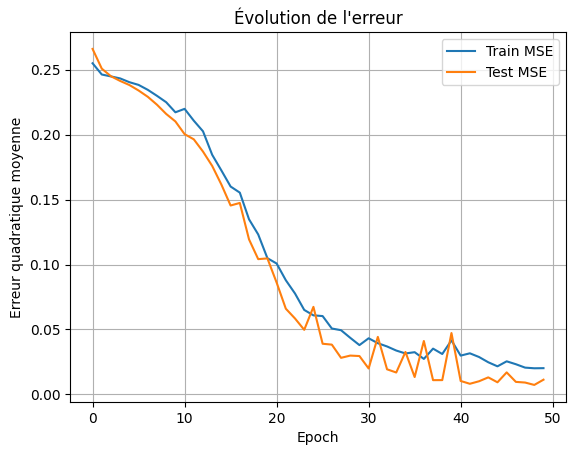

In [7]:
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Test MSE')
plt.xlabel("Epoch")
plt.ylabel("Erreur quadratique moyenne")
plt.legend()
plt.title("Évolution de l'erreur")
plt.grid(True)
plt.show()
